In [1]:
import time
import random
import math
import array
import pandas as pd
#from threading import Thread 
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from CenterPiezoRS import center_piezo
from GrabLocation import grab_location
#from BlasterDatacollection import dataB
from Movements import move_negX,move_posX,move_negY,move_posY
import config_constants as cc
import os

<IPython.core.display.Javascript object>

In [2]:
min_time = 0.2
max_time = 2.0
increments = 0.05
name = '\AutoDriftTest'
t = time.localtime()
current_time = time.strftime('_%Y%m%d_%H%M%S', t)
name = name+current_time
print(name)
folder = '.\Results'
os.mkdir(folder+name)
fulllist = name+'\FullList'
startlist = name+'\StartList'
endlist = name+'\EndList'
x = 0
y = 0

\AutoDriftTest_20230314_141649


<IPython.core.display.Javascript object>

,original_pos_xy,Final_pos_xy,max_xy,min_xy,Radius_x,Radius_y,Area
0,"(7.696750000000001, 7.28875)","([7.696750000000001], [7.28875])","(7.696750000000001, 7.28875)","(7.696750000000001, 7.28875)",0.0,0.0,0.0


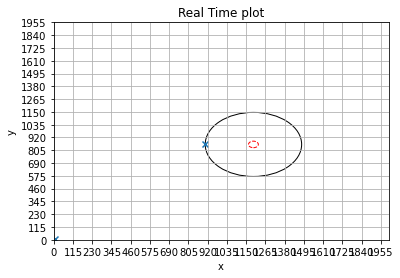

posX 1.5 Vpp 1.950000000000001 s
('USB0::0x2A8D::0x0387::CN61022130::0::INSTR', 'USB0::0xF4ED::0xEE3A::388C14124::0::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR', 'ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL6::INSTR', 'ASRL9::INSTR')
*IDN BK Precision,4052,388C14124,1.01.01.31R1,02-00-00-22-26

Configuring C1
Done.
AutoTest complete.


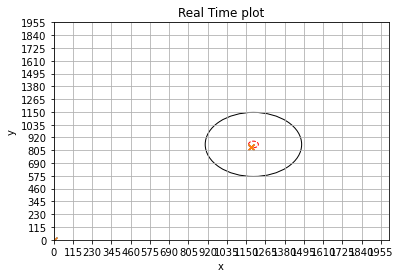

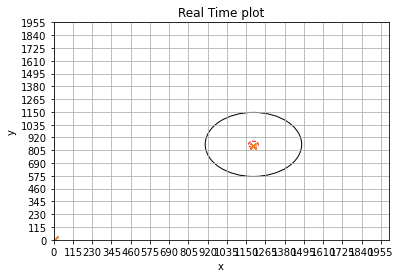

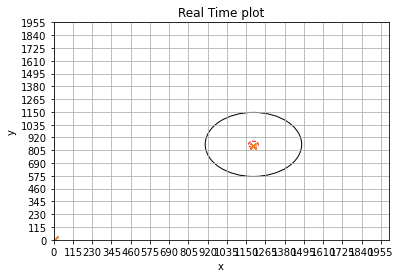

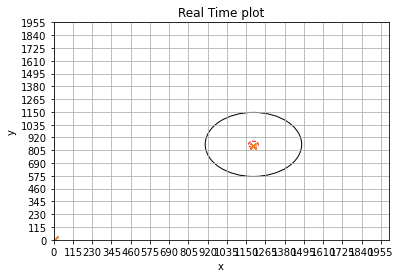

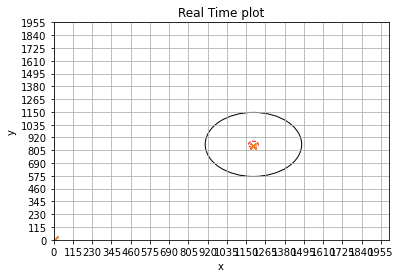

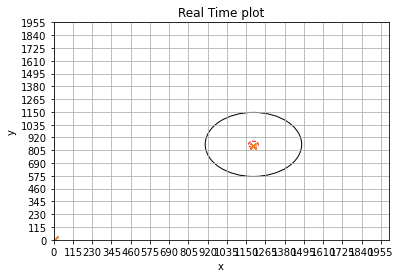

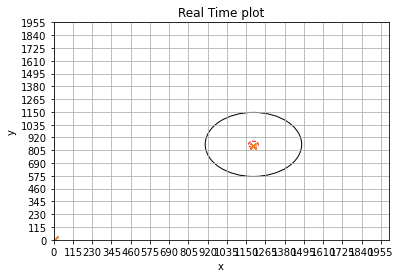

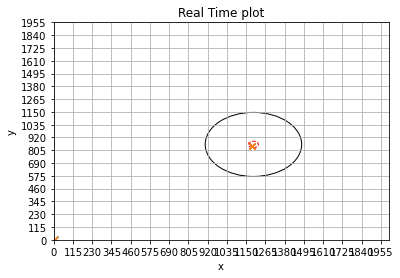

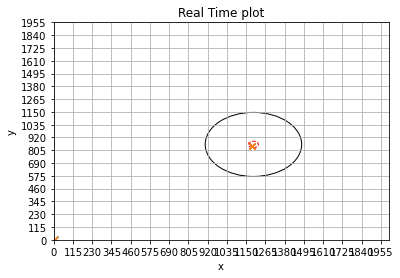

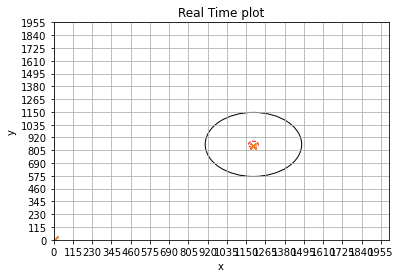

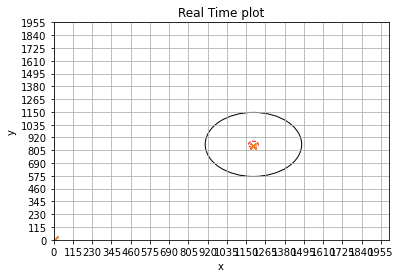

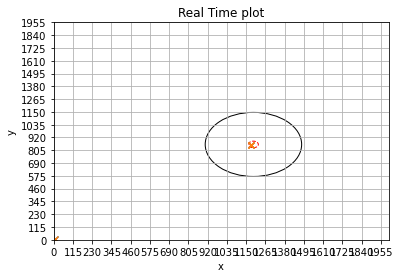

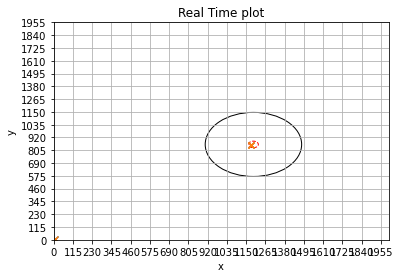

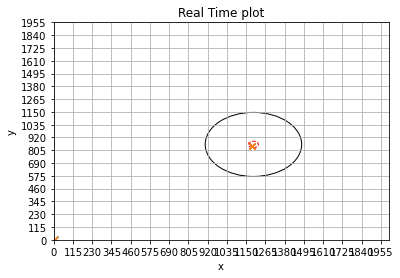

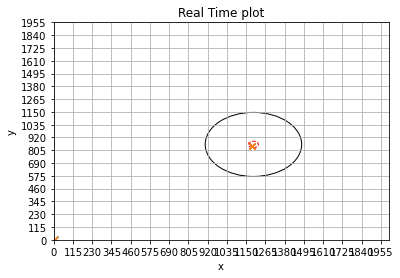

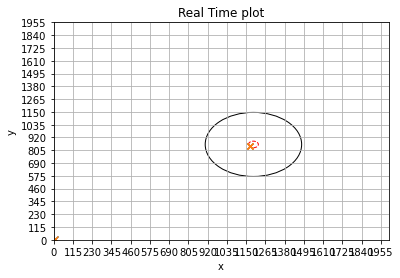

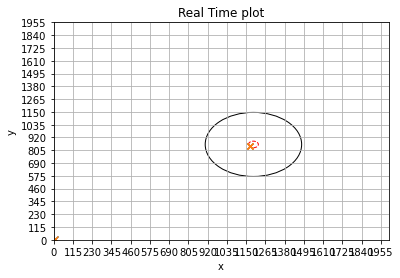

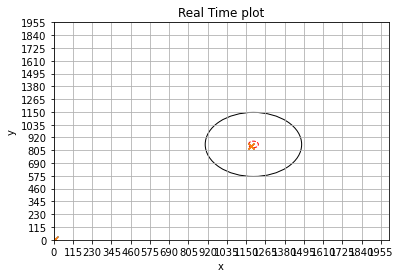

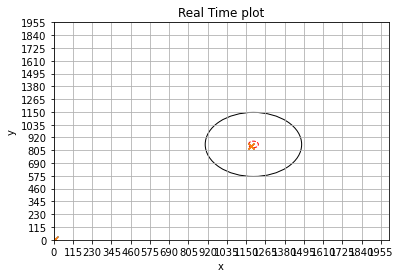

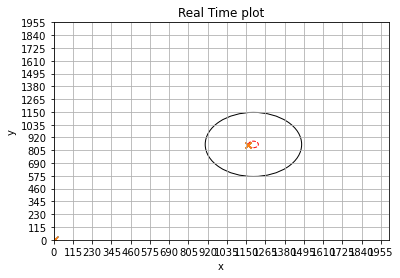

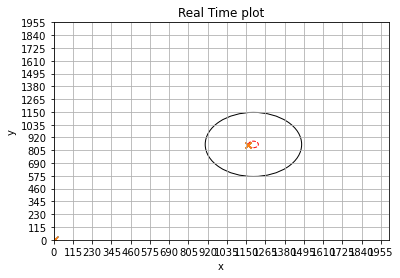

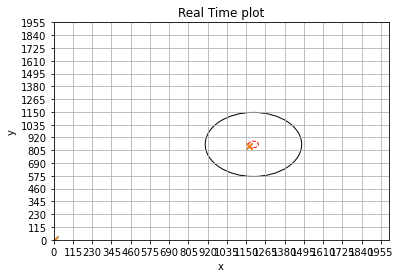

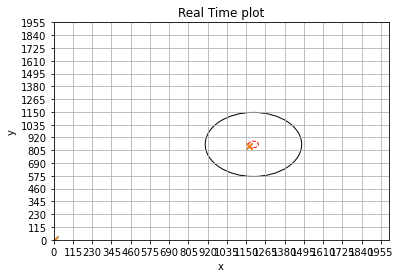

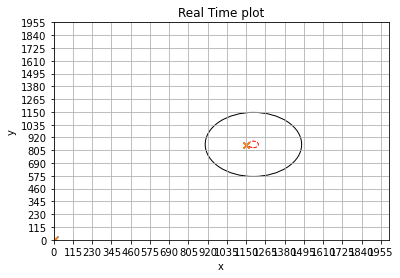

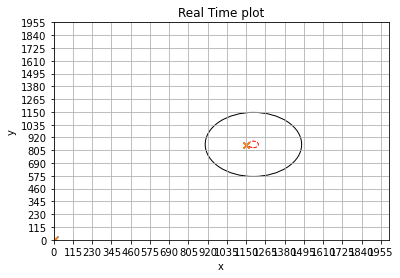

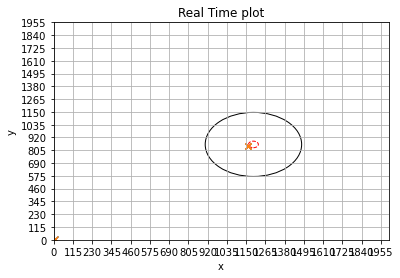

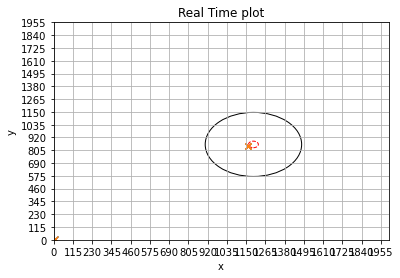

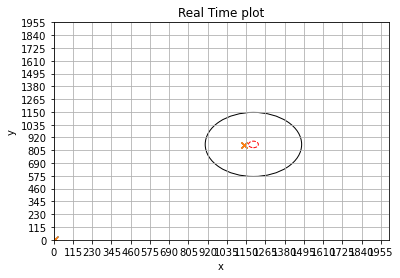

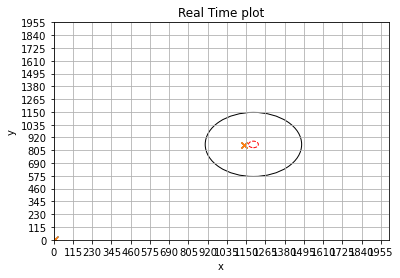

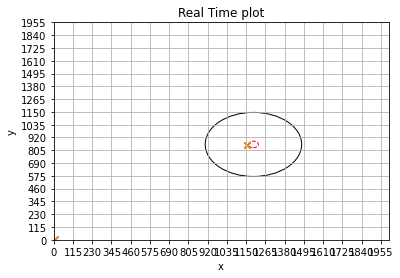

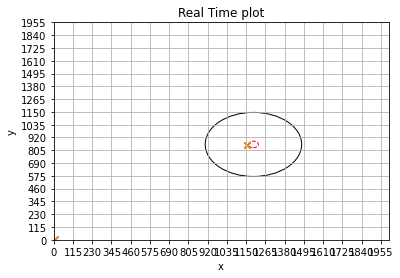

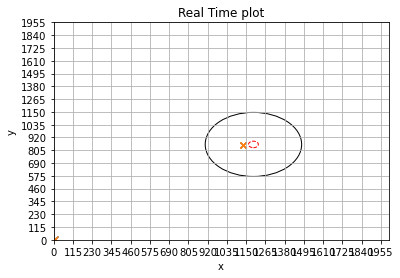

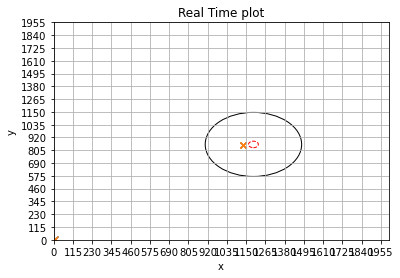

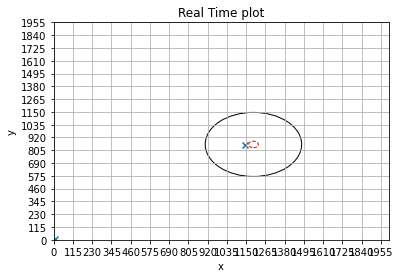

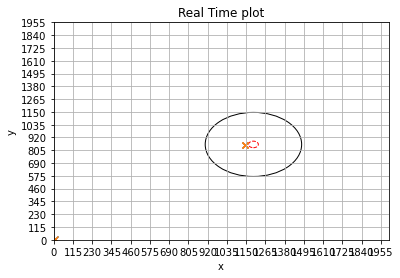

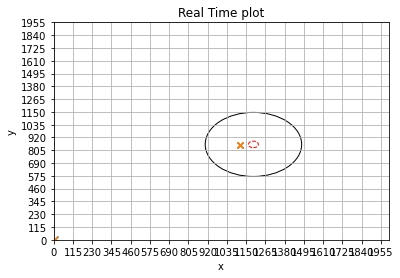

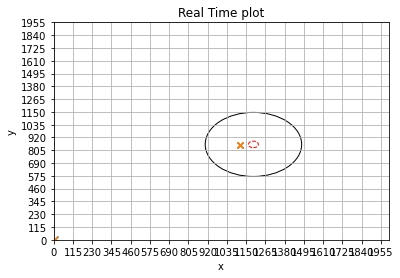

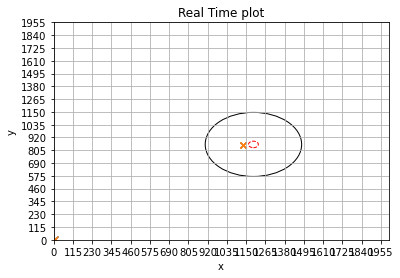

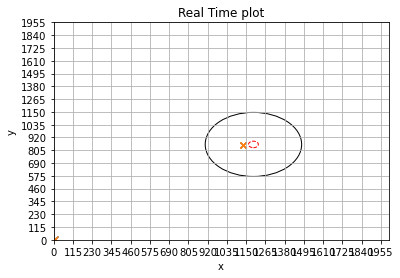

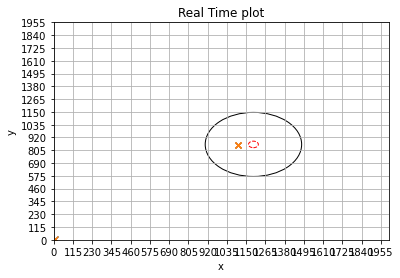

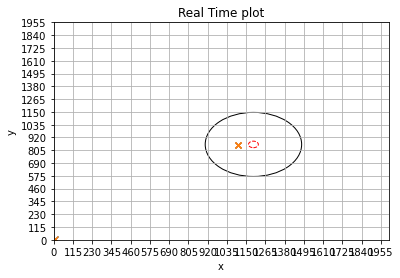

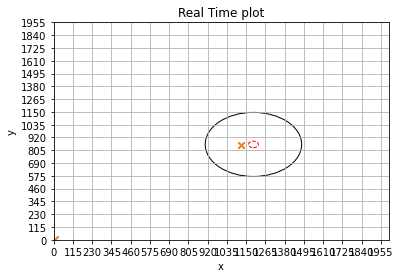

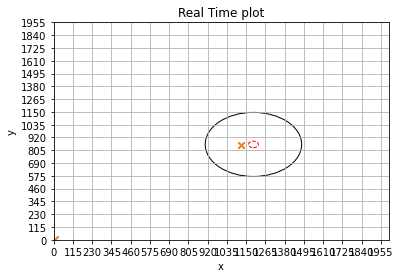

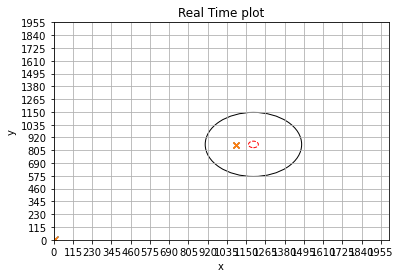

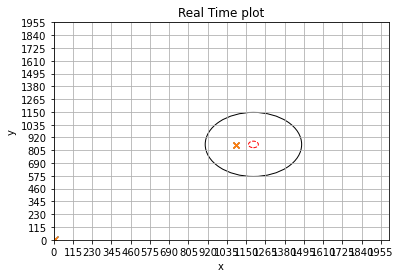

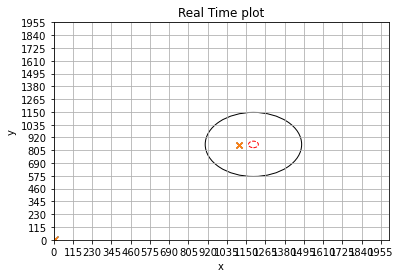

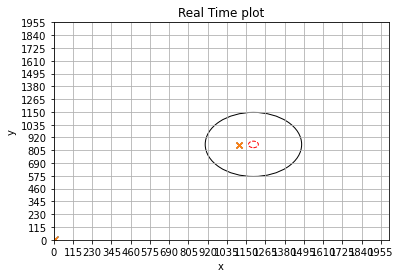

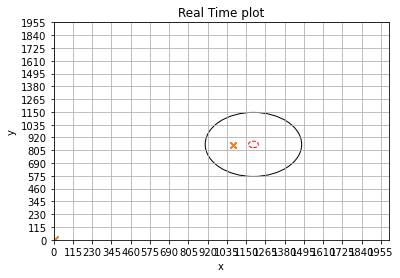

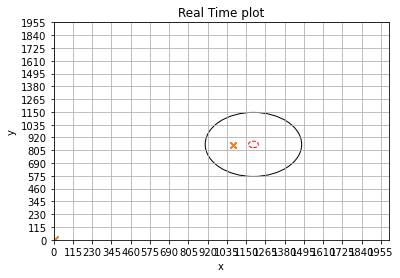

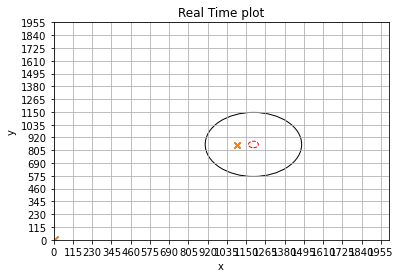

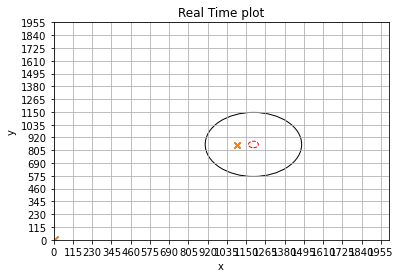

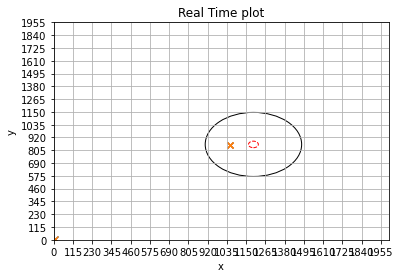

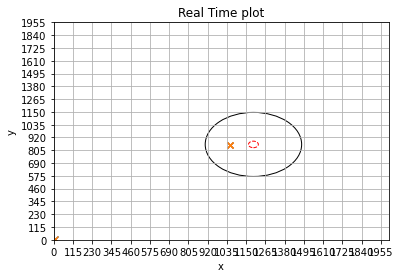

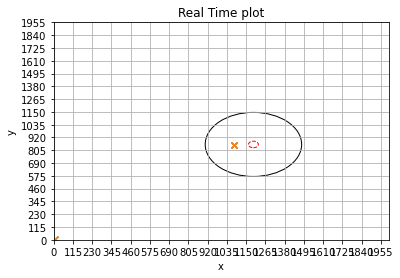

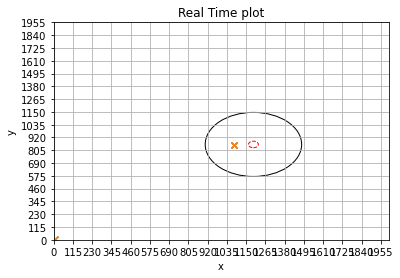

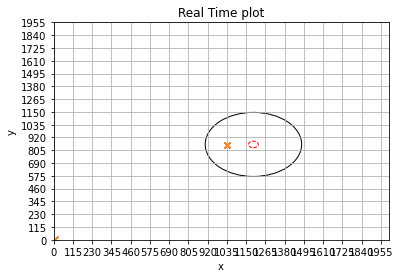

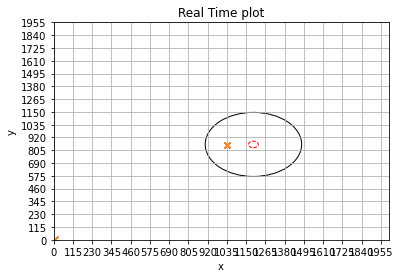

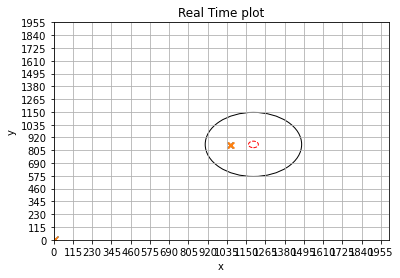

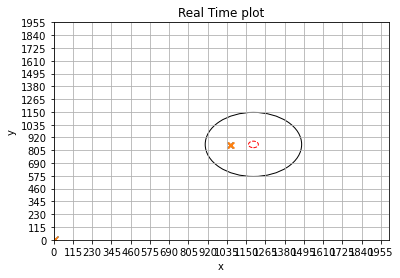

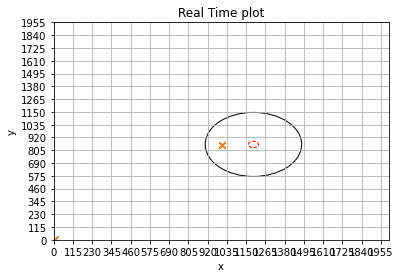

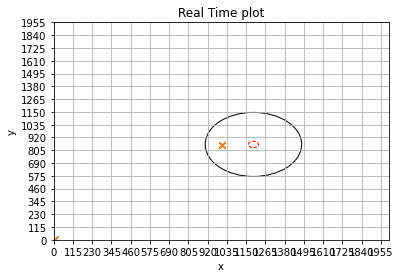

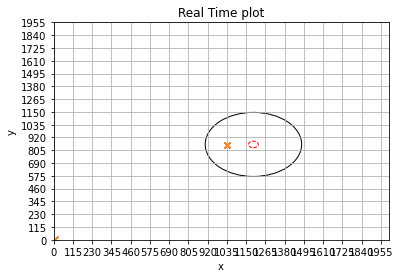

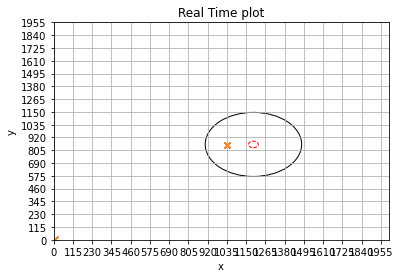

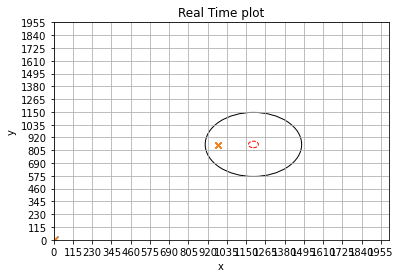

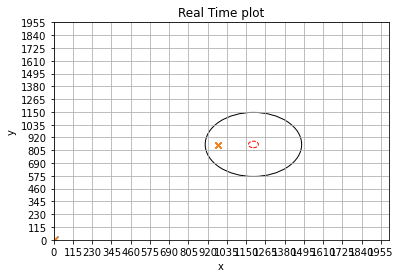

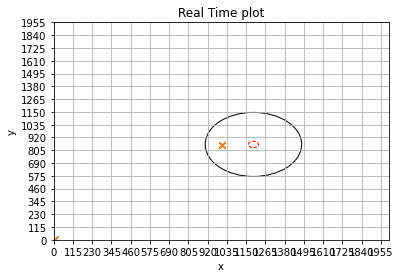

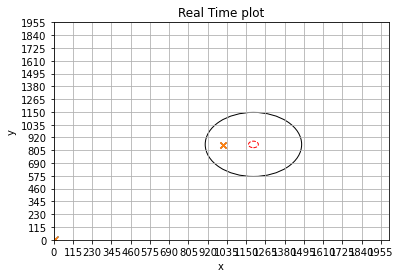

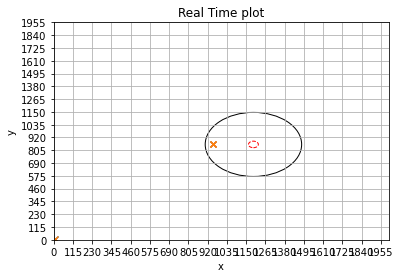

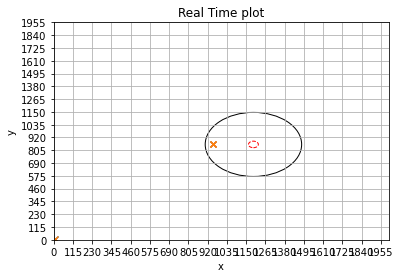

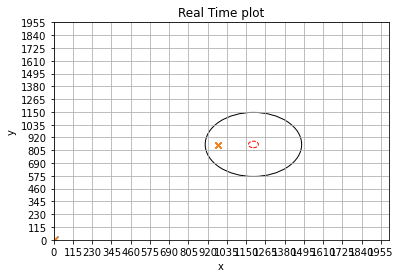

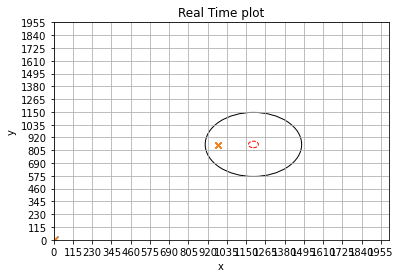

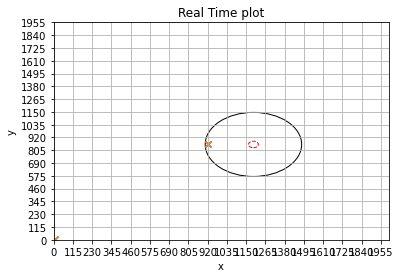

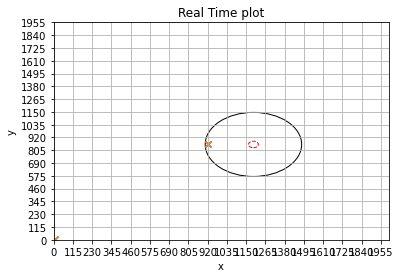

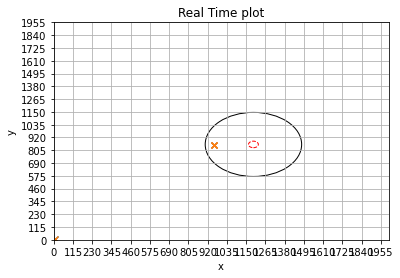

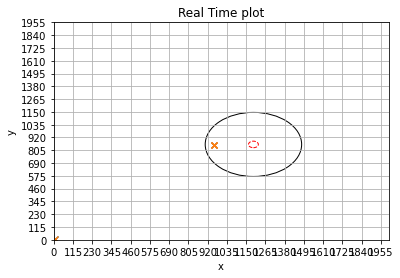

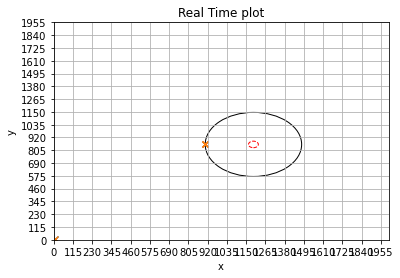

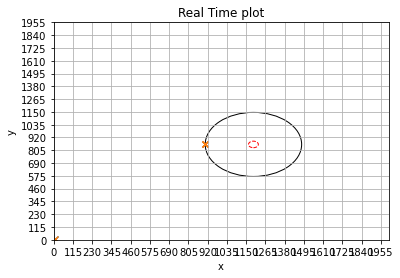

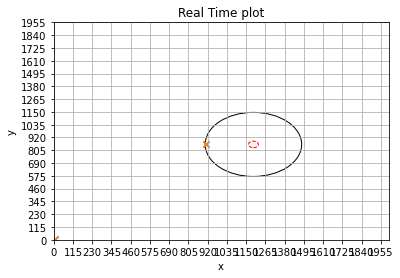

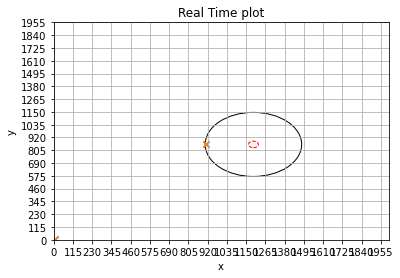

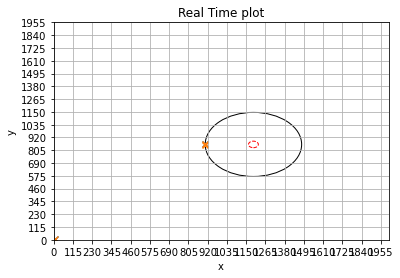

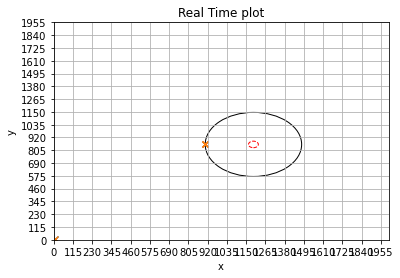

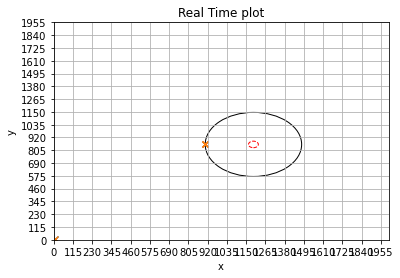

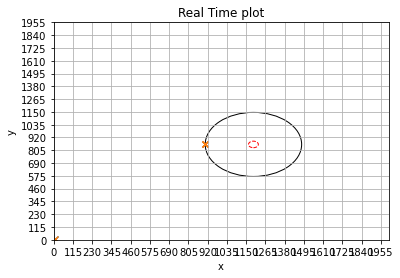

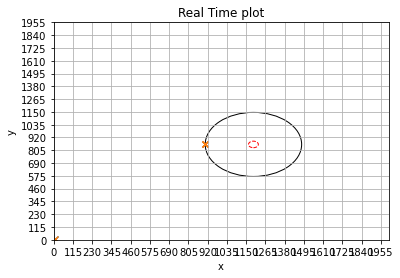

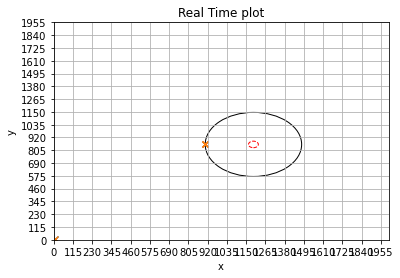

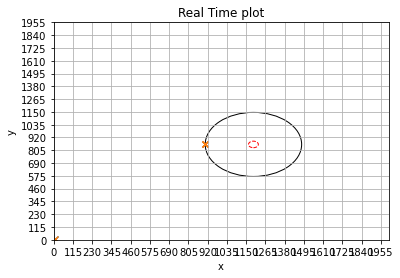

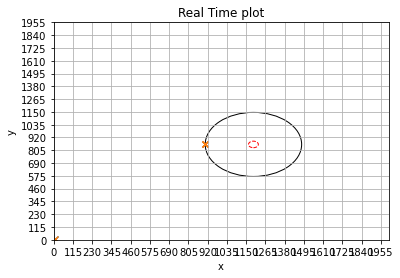

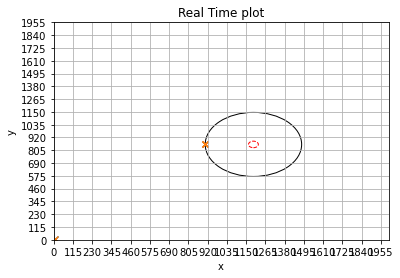

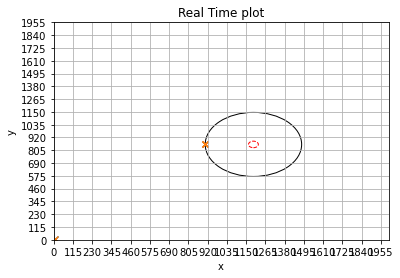

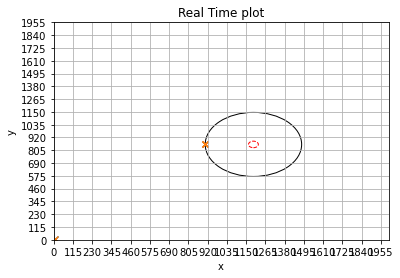

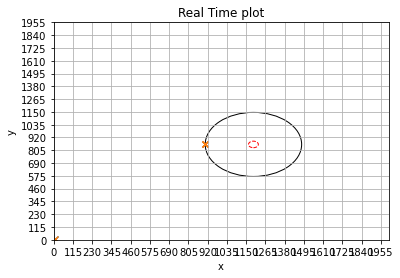

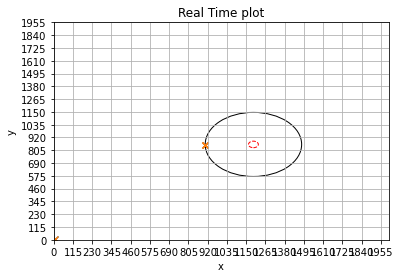

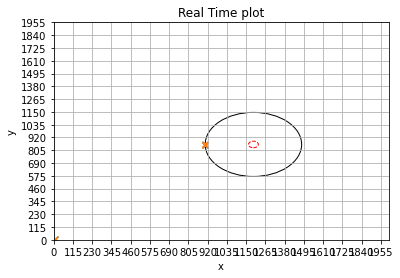

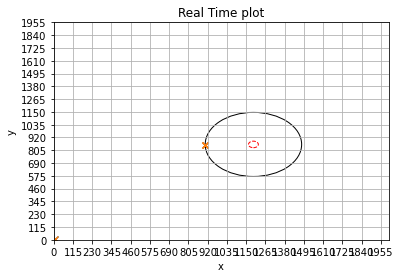

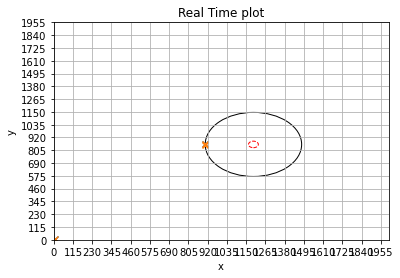

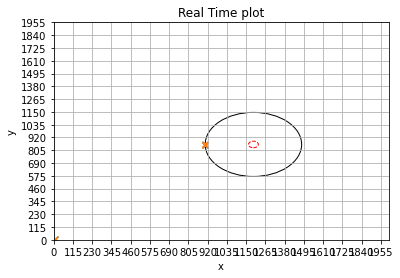

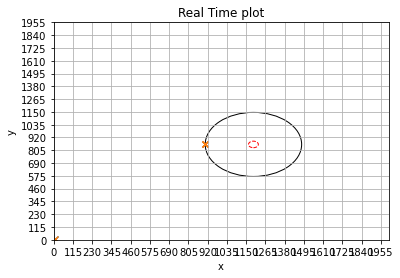

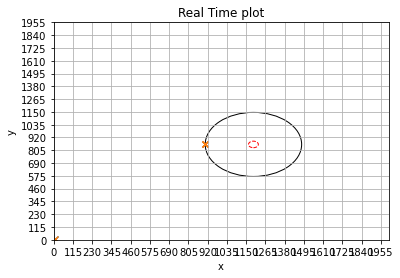

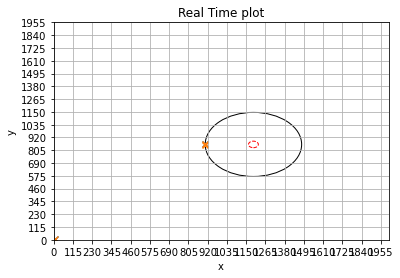

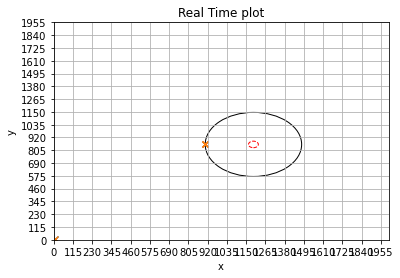

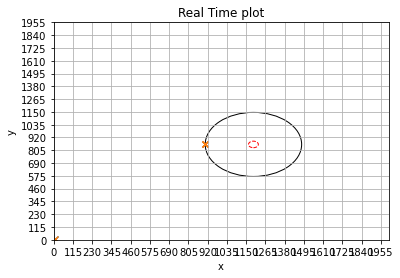

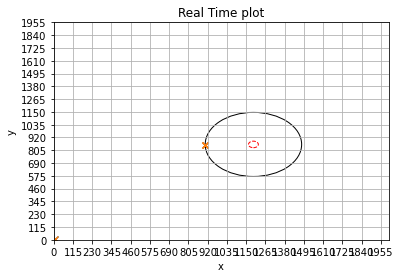

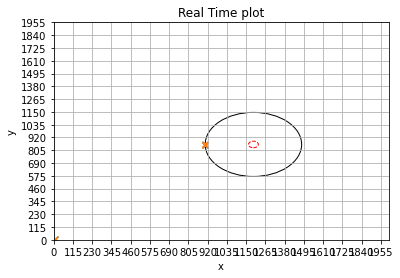

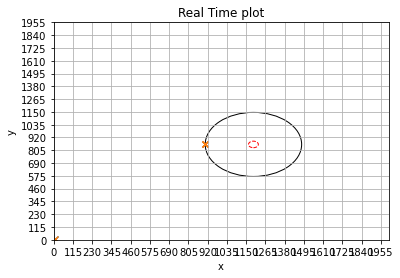

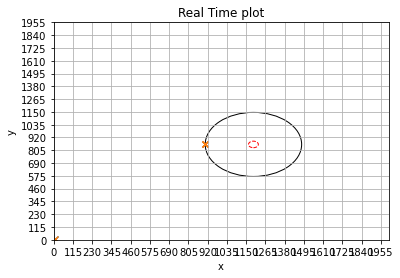

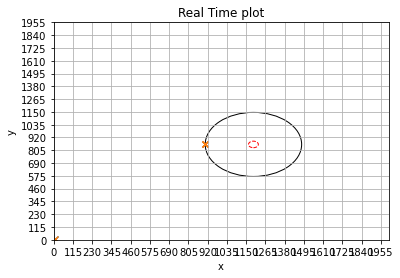

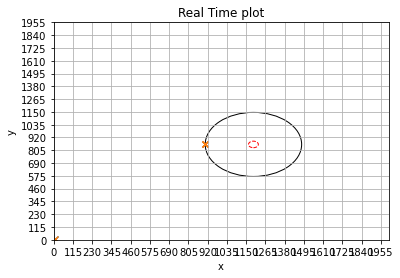

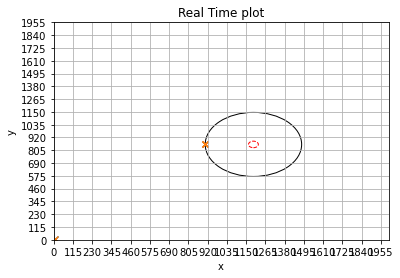

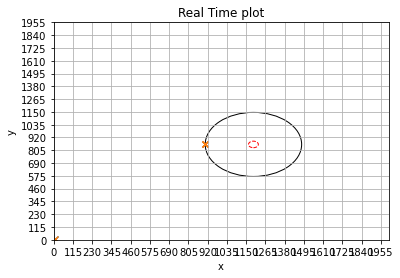

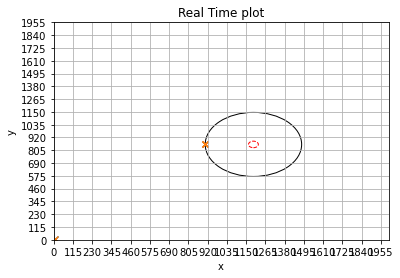

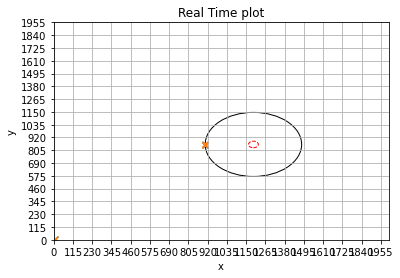

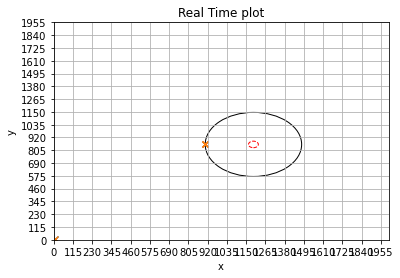

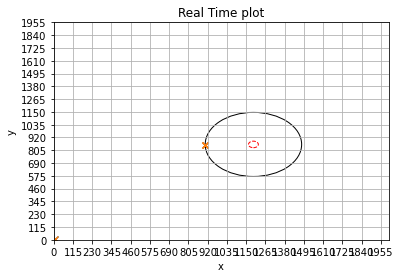

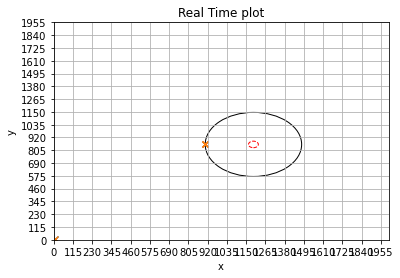

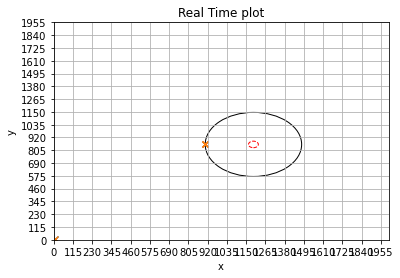

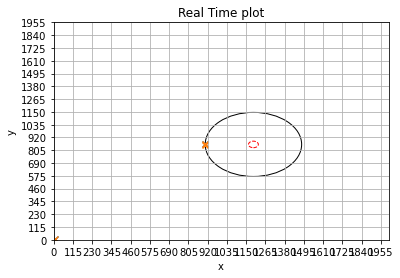

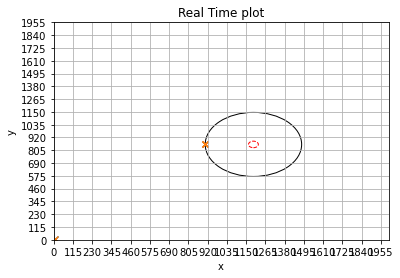

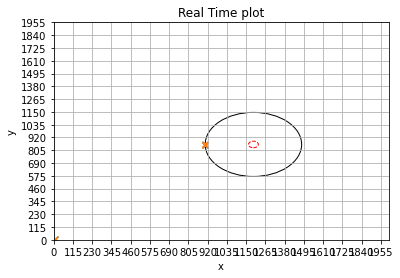

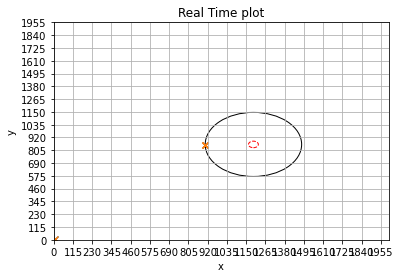

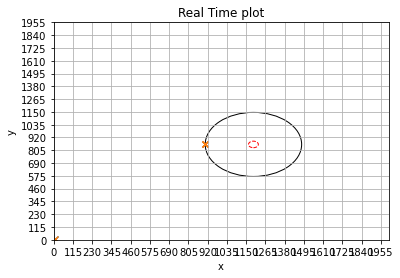

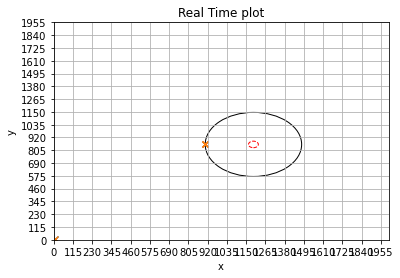

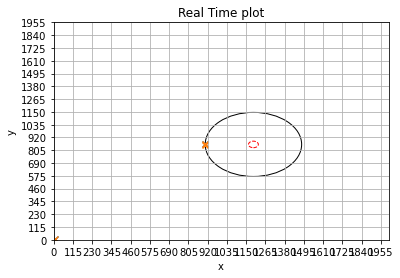

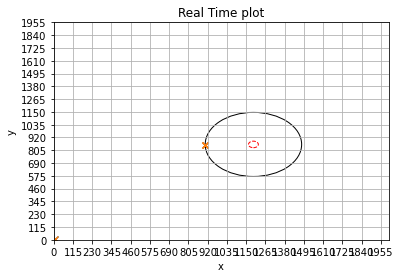

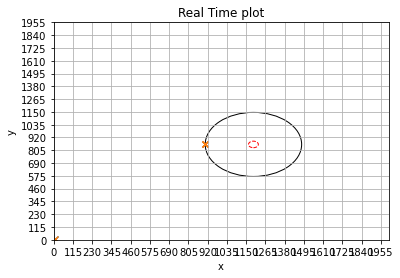

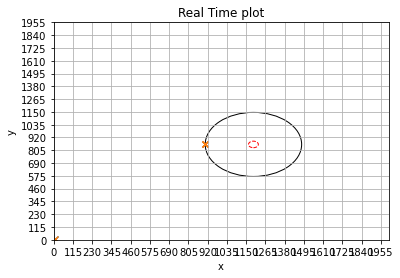

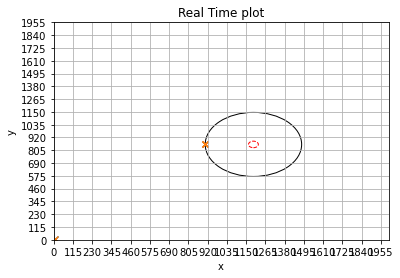

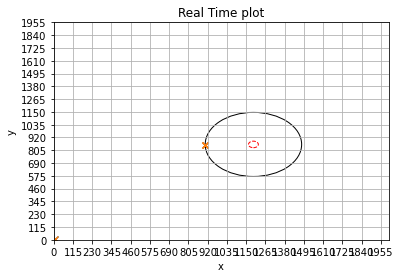

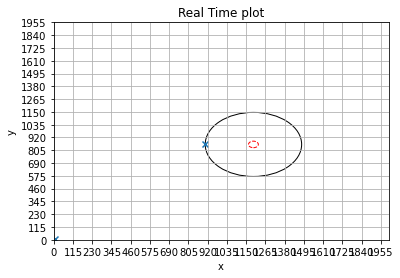

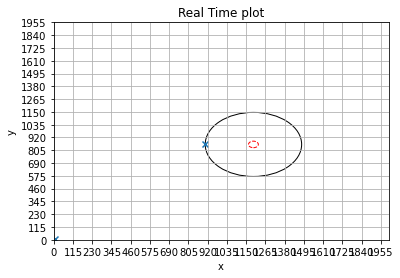

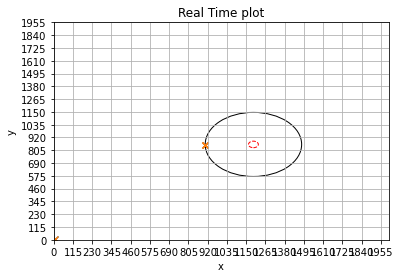

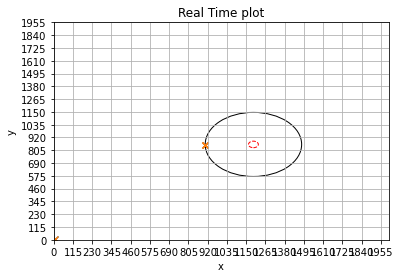

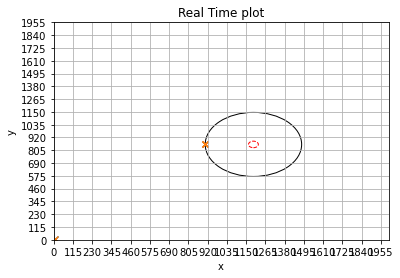

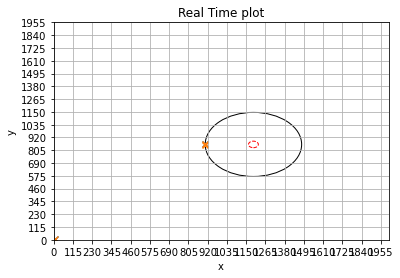

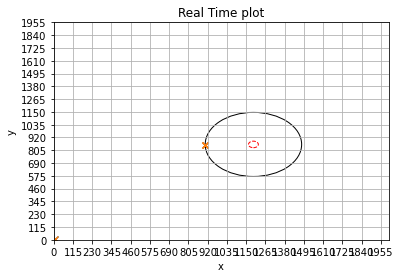

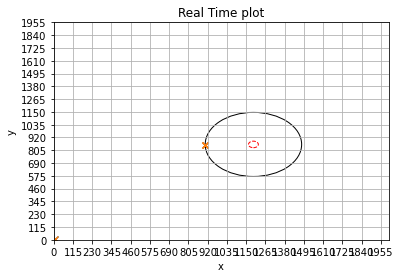

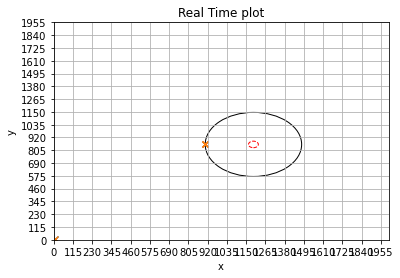

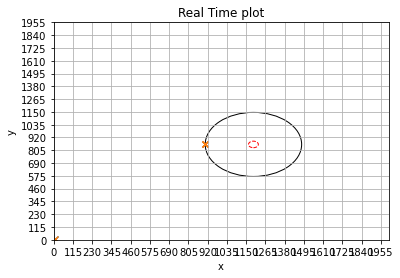

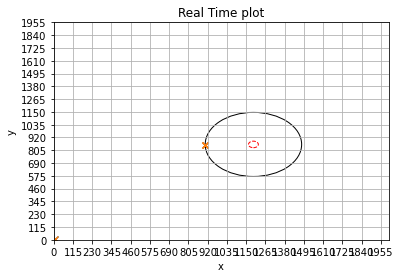

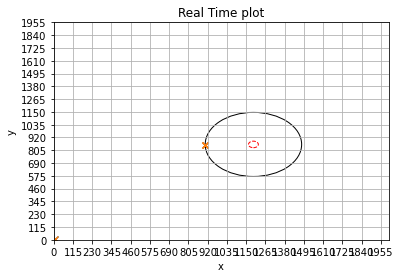

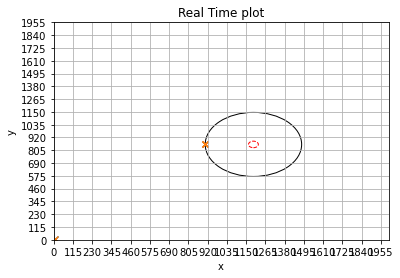

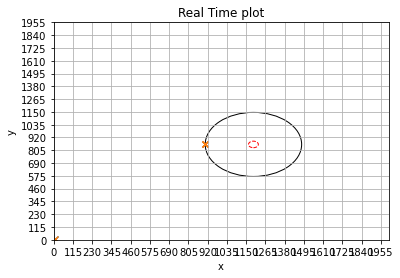

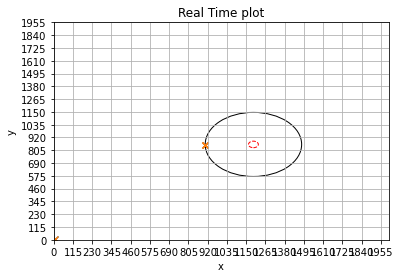

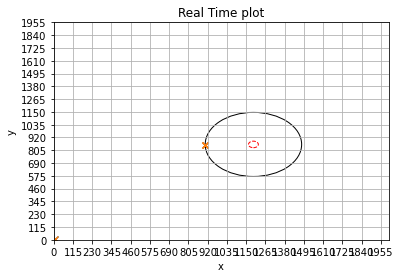

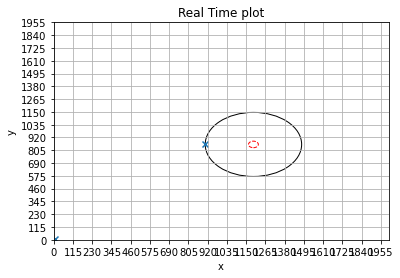

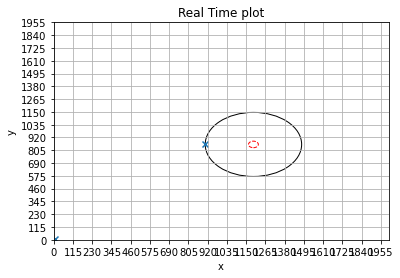

In [3]:
#loop through the test, increasing by increments
n = min_time
while n <= max_time:
    print('time',n)
    
    if n == min_time:
        x,y = grab_location('junk')
        moveXY(cc.circle['circle_x']-x,cc.circle['circle_y']-y) #send the piezo back to the center
        x,y = grab_location(startlist)
        x,y = grab_location(fulllist)
        
    else:
        x,y = grab_location(startlist)
        x,y = grab_location(fulllist)
    
    move_negX(cc.voltage,n)
    #time.sleep(1)
    
    x,y = grab_location(endlist)
    x,y = grab_location(fulllist)
    
    move_posX(cc.voltage,n)
    #time.sleep(1)
    
    n += increments
else:
    print('AutoTest complete.')